In [1]:
# Import the modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!


loan_data_df = pd.read_csv(
    Path('Resources/mlpdy22q4_1row.csv')
)
loan_data_df.set_index("lnno",drop=True)


# Review the DataFrame
# YOUR CODE HERE!

display(loan_data_df.head())
display(loan_data_df.tail())

,lnno,quarter,mrtg_status,amt_upb_endg,liq_upb_amt,dt_fund,amt_upb_pch,dealname,rate_ltv,rate_dcr,...,PreFcl_FCL_ExpInc,REO_Operating_ExpInc,dt_sold,Sales_Price,Selling_ExpInc,credit_loss,liq_dte,id_link_grp,lien_number,flag_defeased
0,99940,y13q2,500,NaN,5224038.58,2007-07-25,5669285.36,NONE,0.79122,1.311000,...,NaN,NaN,NaN,NaN,NaN,NaN,31MAY2013,75103.0,Second Mortgage,NaN
1,119981,y08q1,500,NaN,7706052.62,1999-08-17,9300000.00,NONE,0.77500,1.310000,...,NaN,NaN,NaN,NaN,NaN,NaN,14FEB2008,NaN,NaN,NaN
2,121981,y18q3,500,NaN,14904262.30,2011-11-09,16243000.00,K-707,0.69504,1.785000,...,NaN,NaN,NaN,NaN,NaN,NaN,31AUG2018,NaN,NaN,NaN
3,158671,y06q3,500,NaN,1612218.73,1996-02-12,1864000.00,NONE,0.80000,1.354000,...,NaN,NaN,NaN,NaN,NaN,NaN,02AUG2006,NaN,NaN,NaN
4,181501,y22q4,100,38079514.1,NaN,2018-11-19,38750000.00,K-086,0.77500,1.689556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,lnno,quarter,mrtg_status,amt_upb_endg,liq_upb_amt,dt_fund,amt_upb_pch,dealname,rate_ltv,rate_dcr,...,PreFcl_FCL_ExpInc,REO_Operating_ExpInc,dt_sold,Sales_Price,Selling_ExpInc,credit_loss,liq_dte,id_link_grp,lien_number,flag_defeased
54646,999869968,y17q3,500,NaN,5798354.85,2007-03-06,6292112.0,NONE,0.72741,1.765000,...,NaN,NaN,NaN,NaN,NaN,NaN,13JUL2017,77532.0,First Mortgage,NaN
54647,999882948,y18q2,500,NaN,26798671.29,2011-09-26,30625000.0,K-705,0.74153,1.251000,...,NaN,NaN,NaN,NaN,NaN,NaN,01JUN2018,NaN,NaN,NaN
54648,999884708,y22q4,100,41007450.80,NaN,2017-07-14,41278000.0,K-067,0.63505,1.708517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54649,999947499,y19q4,500,NaN,46800000.00,2018-11-09,46800000.0,K-BF2,0.80000,1.959734,...,NaN,NaN,NaN,NaN,NaN,NaN,01OCT2019,NaN,NaN,NaN
54650,999950499,y22q4,100,2119611.48,NaN,2019-02-11,2172000.0,SB-63,0.67453,1.593434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_data_df.shape

(54651, 35)

In [4]:
loan_data_df[loan_data_df.duplicated()]

,lnno,quarter,mrtg_status,amt_upb_endg,liq_upb_amt,dt_fund,amt_upb_pch,dealname,rate_ltv,rate_dcr,...,PreFcl_FCL_ExpInc,REO_Operating_ExpInc,dt_sold,Sales_Price,Selling_ExpInc,credit_loss,liq_dte,id_link_grp,lien_number,flag_defeased


In [5]:
loan_data_df.duplicated(subset=['lnno'])

0        False
1        False
2        False
3        False
4        False
         ...  
54646    False
54647    False
54648    False
54649    False
54650    False
Length: 54651, dtype: bool

In [6]:
missing_vals = loan_data_df.isnull().sum()
missing_vals

lnno                        0
quarter                     0
mrtg_status                 0
amt_upb_endg            18801
liq_upb_amt             30057
dt_fund                     0
amt_upb_pch                 0
dealname                    0
rate_ltv                    1
rate_dcr                    5
code_int                  158
rate_int                  163
cd_fxfltr               41812
cnt_amtn_per              223
cnt_blln_term             223
cnt_io_per                213
cnt_mrtg_term               0
cnt_rsdntl_unit            22
cnt_yld_maint             194
code_sr                 52211
dt_io_end               20378
dt_mty                      0
geographical_region        16
code_st                     0
securitized             16227
PreFcl_FCL_ExpInc       54574
REO_Operating_ExpInc    54577
dt_sold                 54561
Sales_Price             54572
Selling_ExpInc          54574
credit_loss             54511
liq_dte                 29958
id_link_grp             52072
lien_numbe

In [7]:
loan_data_df[["year","quarter"]]=loan_data_df["quarter"].str.split("q",expand=True)

loan_data_df[["y","year"]]=loan_data_df["year"].str.split("y",expand=True)

loan_data_df=loan_data_df.drop(["y"],1)




In [8]:
loan_data_df

,lnno,quarter,mrtg_status,amt_upb_endg,liq_upb_amt,dt_fund,amt_upb_pch,dealname,rate_ltv,rate_dcr,...,REO_Operating_ExpInc,dt_sold,Sales_Price,Selling_ExpInc,credit_loss,liq_dte,id_link_grp,lien_number,flag_defeased,year
0,99940,2,500,NaN,5224038.58,2007-07-25,5669285.36,NONE,0.79122,1.311000,...,NaN,NaN,NaN,NaN,NaN,31MAY2013,75103.0,Second Mortgage,NaN,13
1,119981,1,500,NaN,7706052.62,1999-08-17,9300000.00,NONE,0.77500,1.310000,...,NaN,NaN,NaN,NaN,NaN,14FEB2008,NaN,NaN,NaN,08
2,121981,3,500,NaN,14904262.30,2011-11-09,16243000.00,K-707,0.69504,1.785000,...,NaN,NaN,NaN,NaN,NaN,31AUG2018,NaN,NaN,NaN,18
3,158671,3,500,NaN,1612218.73,1996-02-12,1864000.00,NONE,0.80000,1.354000,...,NaN,NaN,NaN,NaN,NaN,02AUG2006,NaN,NaN,NaN,06
4,181501,4,100,38079514.10,NaN,2018-11-19,38750000.00,K-086,0.77500,1.689556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54646,999869968,3,500,NaN,5798354.85,2007-03-06,6292112.00,NONE,0.72741,1.765000,...,NaN,NaN,NaN,NaN,NaN,13JUL2017,77532.0,First Mortgage,NaN,17
54647,999882948,2,500,NaN,26798671.29,2011-09-26,30625000.00,K-705,0.74153,1.251000,...,NaN,NaN,NaN,NaN,NaN,01JUN2018,NaN,NaN,NaN,18
54648,999884708,4,100,41007450.80,NaN,2017-07-14,41278000.00,K-067,0.63505,1.708517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
54649,999947499,4,500,NaN,46800000.00,2018-11-09,46800000.00,K-BF2,0.80000,1.959734,...,NaN,NaN,NaN,NaN,NaN,01OCT2019,NaN,NaN,NaN,19


In [9]:
loan_data_df.lnno.count()

54651

In [10]:
loan_data_df.amt_upb_endg = loan_data_df.amt_upb_endg.fillna(0.00)

In [11]:
loan_data_df.liq_upb_amt = loan_data_df.liq_upb_amt.fillna(0.00)

In [12]:
loan_data_df.dtypes

lnno                      int64
quarter                  object
mrtg_status               int64
amt_upb_endg            float64
liq_upb_amt             float64
dt_fund                  object
amt_upb_pch             float64
dealname                 object
rate_ltv                float64
rate_dcr                float64
code_int                 object
rate_int                float64
cd_fxfltr                object
cnt_amtn_per            float64
cnt_blln_term           float64
cnt_io_per              float64
cnt_mrtg_term             int64
cnt_rsdntl_unit         float64
cnt_yld_maint           float64
code_sr                  object
dt_io_end                object
dt_mty                   object
geographical_region      object
code_st                  object
securitized              object
PreFcl_FCL_ExpInc       float64
REO_Operating_ExpInc    float64
dt_sold                  object
Sales_Price             float64
Selling_ExpInc          float64
credit_loss             float64
liq_dte 

In [13]:
# Convert date columns to datetime format
loan_data_df['dt_fund'] = pd.to_datetime(loan_data_df['dt_fund'])
loan_data_df['dt_sold'] = pd.to_datetime(loan_data_df['dt_sold'])


In [14]:
loan_data_df

,lnno,quarter,mrtg_status,amt_upb_endg,liq_upb_amt,dt_fund,amt_upb_pch,dealname,rate_ltv,rate_dcr,...,REO_Operating_ExpInc,dt_sold,Sales_Price,Selling_ExpInc,credit_loss,liq_dte,id_link_grp,lien_number,flag_defeased,year
0,99940,2,500,0.00,5224038.58,2007-07-25,5669285.36,NONE,0.79122,1.311000,...,NaN,NaT,NaN,NaN,NaN,31MAY2013,75103.0,Second Mortgage,NaN,13
1,119981,1,500,0.00,7706052.62,1999-08-17,9300000.00,NONE,0.77500,1.310000,...,NaN,NaT,NaN,NaN,NaN,14FEB2008,NaN,NaN,NaN,08
2,121981,3,500,0.00,14904262.30,2011-11-09,16243000.00,K-707,0.69504,1.785000,...,NaN,NaT,NaN,NaN,NaN,31AUG2018,NaN,NaN,NaN,18
3,158671,3,500,0.00,1612218.73,1996-02-12,1864000.00,NONE,0.80000,1.354000,...,NaN,NaT,NaN,NaN,NaN,02AUG2006,NaN,NaN,NaN,06
4,181501,4,100,38079514.10,0.00,2018-11-19,38750000.00,K-086,0.77500,1.689556,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54646,999869968,3,500,0.00,5798354.85,2007-03-06,6292112.00,NONE,0.72741,1.765000,...,NaN,NaT,NaN,NaN,NaN,13JUL2017,77532.0,First Mortgage,NaN,17
54647,999882948,2,500,0.00,26798671.29,2011-09-26,30625000.00,K-705,0.74153,1.251000,...,NaN,NaT,NaN,NaN,NaN,01JUN2018,NaN,NaN,NaN,18
54648,999884708,4,100,41007450.80,0.00,2017-07-14,41278000.00,K-067,0.63505,1.708517,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
54649,999947499,4,500,0.00,46800000.00,2018-11-09,46800000.00,K-BF2,0.80000,1.959734,...,NaN,NaT,NaN,NaN,NaN,01OCT2019,NaN,NaN,NaN,19


In [15]:
loan_data_df.isnull().sum()

lnno                        0
quarter                     0
mrtg_status                 0
amt_upb_endg                0
liq_upb_amt                 0
dt_fund                     0
amt_upb_pch                 0
dealname                    0
rate_ltv                    1
rate_dcr                    5
code_int                  158
rate_int                  163
cd_fxfltr               41812
cnt_amtn_per              223
cnt_blln_term             223
cnt_io_per                213
cnt_mrtg_term               0
cnt_rsdntl_unit            22
cnt_yld_maint             194
code_sr                 52211
dt_io_end               20378
dt_mty                      0
geographical_region        16
code_st                     0
securitized             16227
PreFcl_FCL_ExpInc       54574
REO_Operating_ExpInc    54577
dt_sold                 54561
Sales_Price             54572
Selling_ExpInc          54574
credit_loss             54511
liq_dte                 29958
id_link_grp             52072
lien_numbe

In [16]:
import pandas as pd

# Assuming you already have the loan_data_df DataFrame

# Replace NaN values with 0.00
loan_data_df_filled = loan_data_df.fillna(0.00)

# Display the DataFrame with NaN values replaced
display(loan_data_df_filled)

,lnno,quarter,mrtg_status,amt_upb_endg,liq_upb_amt,dt_fund,amt_upb_pch,dealname,rate_ltv,rate_dcr,...,REO_Operating_ExpInc,dt_sold,Sales_Price,Selling_ExpInc,credit_loss,liq_dte,id_link_grp,lien_number,flag_defeased,year
0,99940,2,500,0.00,5224038.58,2007-07-25,5669285.36,NONE,0.79122,1.311000,...,0.0,0.0,0.0,0.0,0.0,31MAY2013,75103.0,Second Mortgage,0.0,13
1,119981,1,500,0.00,7706052.62,1999-08-17,9300000.00,NONE,0.77500,1.310000,...,0.0,0.0,0.0,0.0,0.0,14FEB2008,0.0,0.0,0.0,08
2,121981,3,500,0.00,14904262.30,2011-11-09,16243000.00,K-707,0.69504,1.785000,...,0.0,0.0,0.0,0.0,0.0,31AUG2018,0.0,0.0,0.0,18
3,158671,3,500,0.00,1612218.73,1996-02-12,1864000.00,NONE,0.80000,1.354000,...,0.0,0.0,0.0,0.0,0.0,02AUG2006,0.0,0.0,0.0,06
4,181501,4,100,38079514.10,0.00,2018-11-19,38750000.00,K-086,0.77500,1.689556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54646,999869968,3,500,0.00,5798354.85,2007-03-06,6292112.00,NONE,0.72741,1.765000,...,0.0,0.0,0.0,0.0,0.0,13JUL2017,77532.0,First Mortgage,0.0,17
54647,999882948,2,500,0.00,26798671.29,2011-09-26,30625000.00,K-705,0.74153,1.251000,...,0.0,0.0,0.0,0.0,0.0,01JUN2018,0.0,0.0,0.0,18
54648,999884708,4,100,41007450.80,0.00,2017-07-14,41278000.00,K-067,0.63505,1.708517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
54649,999947499,4,500,0.00,46800000.00,2018-11-09,46800000.00,K-BF2,0.80000,1.959734,...,0.0,0.0,0.0,0.0,0.0,01OCT2019,0.0,0.0,0.0,19


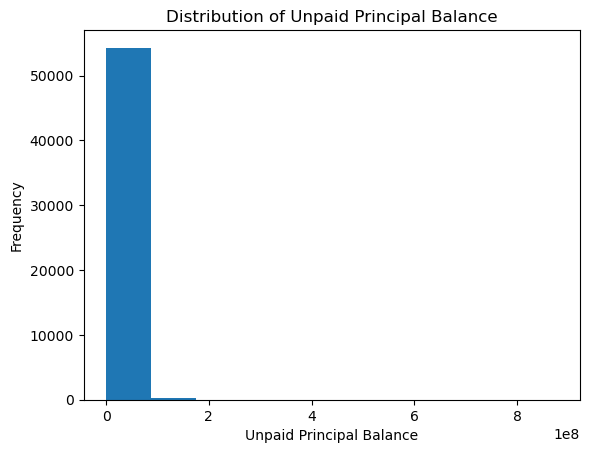

In [17]:
import matplotlib.pyplot as plt

# Plot a histogram
plt.hist(loan_data_df['amt_upb_endg'], bins=10)
plt.xlabel('Unpaid Principal Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Unpaid Principal Balance')
plt.show()



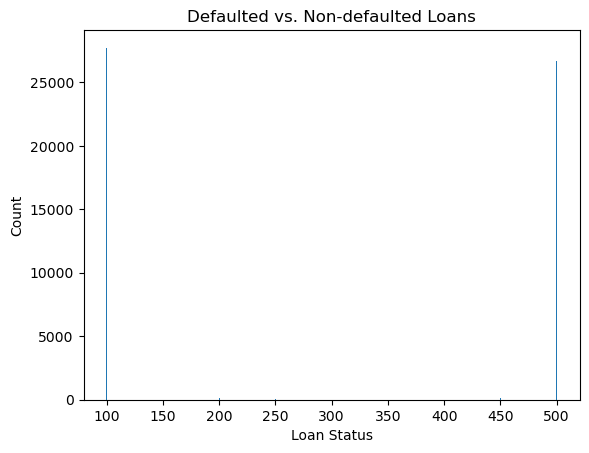

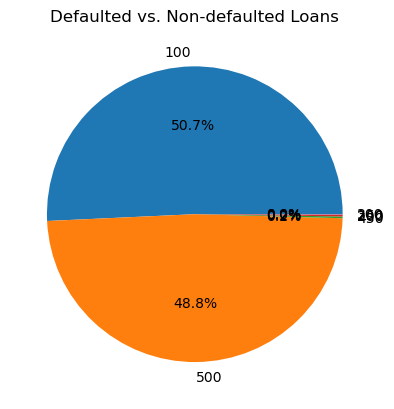

In [18]:
default_counts = loan_data_df['mrtg_status'].value_counts()

plt.bar(default_counts.index, default_counts.values)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Defaulted vs. Non-defaulted Loans')
plt.show()

# Alternatively, create a pie chart
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%')
plt.title('Defaulted vs. Non-defaulted Loans')
plt.show()

In conclusion, based on the provided data, we can observe that:

- There are over 25,000 loans that are categorized as "current" or "less than 60 days delinquent". This indicates that a significant portion of the loans in the dataset are in good standing and being paid on time.
- Additionally, there are over 25,000 loans that are classified as "closed". This suggests that a substantial number of loans have reached the end of their term or have been fully paid off.

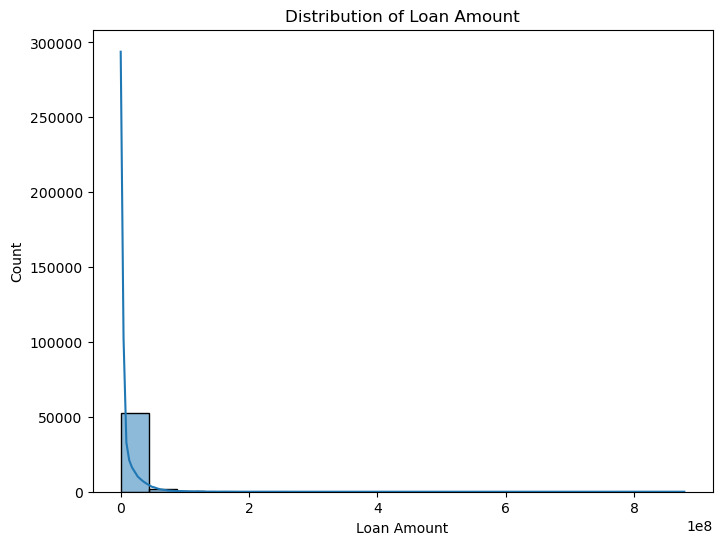

In [19]:
# Analyze Loan Amount and UPB
plt.figure(figsize=(8, 6))
sns.histplot(loan_data_df['amt_upb_endg'], bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()

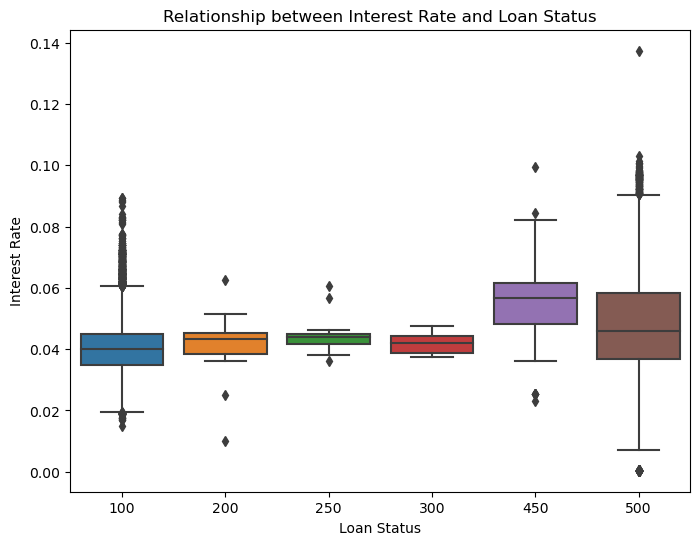

In [20]:
# Analyze Interest Rates
plt.figure(figsize=(8, 6))
sns.boxplot(x='mrtg_status', y='rate_int', data=loan_data_df)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Relationship between Interest Rate and Loan Status')
plt.show()

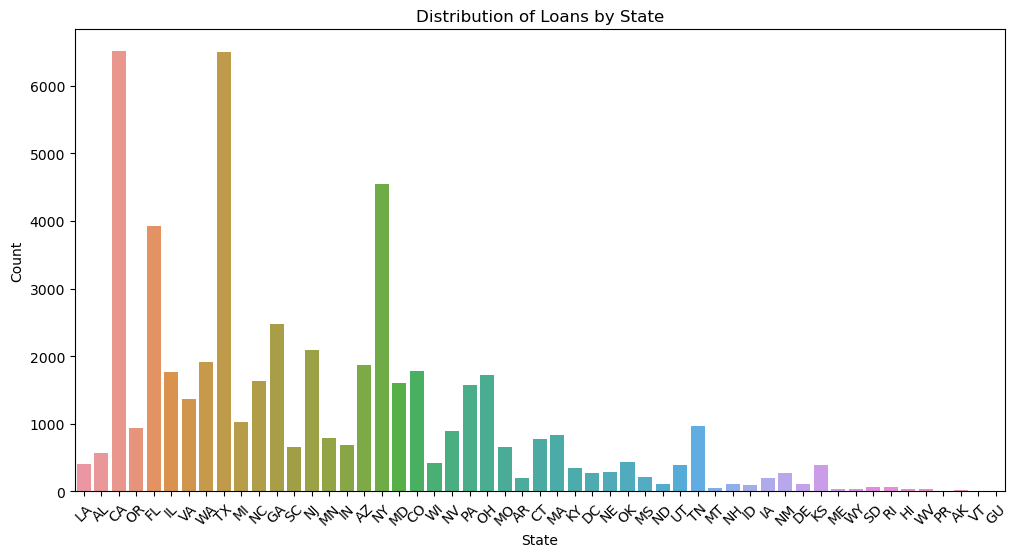

In [21]:
# Geographical Analysis


plt.figure(figsize=(12, 6))
sns.countplot(x='code_st', data=loan_data_df)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Loans by State')
plt.xticks(rotation=45)
plt.show()

The analysis reveals that California and Texas are the two states with the highest distribution of loans, indicating a significant presence of loan activity in these regions.

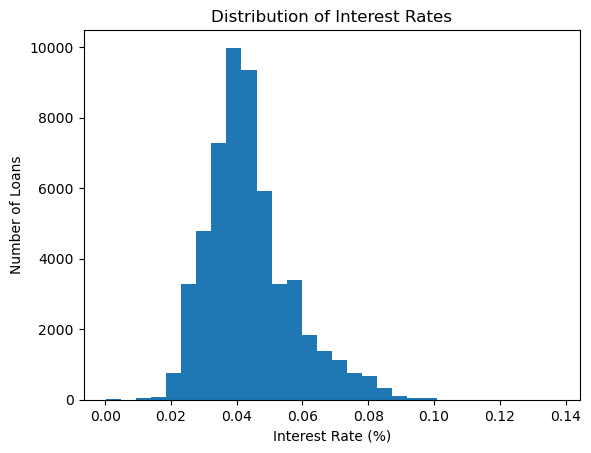

In [22]:
import matplotlib.pyplot as plt

# Create a histogram of the interest rates
plt.hist(loan_data_df['rate_int'], bins=30)

# Set the title and labels
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Number of Loans')

# Display the plot
plt.show()

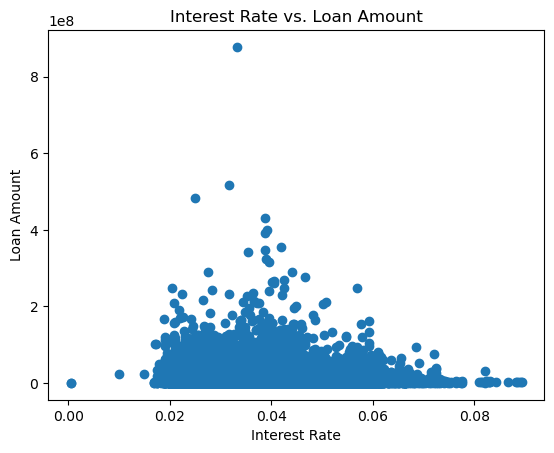

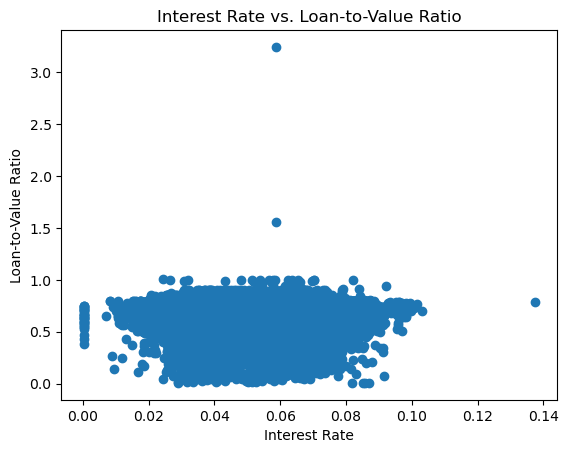

In [23]:
import pandas as pd
import seaborn as sns

# Read in the loan data CSV file
loan_data_df = pd.read_csv(
    Path('Resources/mlpdy22q4_1row.csv')
)


# Create a scatter plot of interest rate vs. loan amount
plt.scatter(loan_data_df['rate_int'], loan_data_df['amt_upb_endg'])
plt.title('Interest Rate vs. Loan Amount')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.show()

# Create a scatter plot of interest rate vs. loan-to-value ratio
plt.scatter(loan_data_df['rate_int'], loan_data_df['rate_ltv'])
plt.title('Interest Rate vs. Loan-to-Value Ratio')
plt.xlabel('Interest Rate')
plt.ylabel('Loan-to-Value Ratio')
plt.show()




Data Cleaning Continued

In [24]:
#create dataframe that only includes target variable and features that will be evaluated
df_2 = pd.DataFrame(loan_data_df_filled, columns=['cnt_mrtg_term','mrtg_status','rate_ltv','cd_fxfltr','cnt_blln_term','cnt_io_per','cnt_rsdntl_unit','code_int','rate_dcr','rate_int'])
df_2.head(5)

,cnt_mrtg_term,mrtg_status,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
0,87,500,0.79122,FXDFLT,87.0,0.0,336.0,FIX,1.311000,0.0594
1,300,500,0.77500,0.0,0.0,0.0,216.0,FIX,1.310000,0.0700
2,84,500,0.69504,0.0,84.0,24.0,120.0,FIX,1.785000,0.0435
3,180,500,0.80000,0.0,180.0,0.0,60.0,FIX,1.354000,0.0775
4,120,100,0.77500,0.0,120.0,36.0,328.0,FIX,1.689556,0.0437


In [25]:
df_2['cd_fxfltr'] = df_2['cd_fxfltr'].apply(lambda x: 1 if x != 0 else 0)
#create binary values for fixed to float feature (0 = no fixed to float feature)

In [26]:
df_2['cnt_blln_term'] = df_2['cnt_blln_term'].apply(lambda x: 1 if x > 0 else 0)
#create binary values for ballooning feature (0 = no balloon feature)

In [27]:
# df_2.cnt_blln_term.value_counts()

In [28]:
df_2['cnt_io_per'] = df_2['cnt_io_per'].apply(lambda x: 1 if x > 0 else 0) 
#create binary values for interest only feature (0 = no IO feature)

In [29]:
df_2

,cnt_mrtg_term,mrtg_status,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
0,87,500,0.79122,1,1,0,336.0,FIX,1.311000,0.059400
1,300,500,0.77500,0,0,0,216.0,FIX,1.310000,0.070000
2,84,500,0.69504,0,1,1,120.0,FIX,1.785000,0.043500
3,180,500,0.80000,0,1,0,60.0,FIX,1.354000,0.077500
4,120,100,0.77500,0,1,1,328.0,FIX,1.689556,0.043700
...,...,...,...,...,...,...,...,...,...,...
54646,132,500,0.72741,1,1,1,128.0,FIX,1.765000,0.055500
54647,84,500,0.74153,0,1,0,346.0,FIX,1.251000,0.041400
54648,120,100,0.63505,0,1,1,191.0,FIX,1.708517,0.042700
54649,84,500,0.80000,0,1,1,328.0,VAR,1.959734,0.038969


In [30]:
#create binary response for fixed (0) and variable (1) rate loan features
df_2.code_int.replace('FIX', 0, inplace = True) 
df_2.code_int.replace('VAR', 1, inplace = True)

In [31]:
df_2

,cnt_mrtg_term,mrtg_status,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
0,87,500,0.79122,1,1,0,336.0,0.0,1.311000,0.059400
1,300,500,0.77500,0,0,0,216.0,0.0,1.310000,0.070000
2,84,500,0.69504,0,1,1,120.0,0.0,1.785000,0.043500
3,180,500,0.80000,0,1,0,60.0,0.0,1.354000,0.077500
4,120,100,0.77500,0,1,1,328.0,0.0,1.689556,0.043700
...,...,...,...,...,...,...,...,...,...,...
54646,132,500,0.72741,1,1,1,128.0,0.0,1.765000,0.055500
54647,84,500,0.74153,0,1,0,346.0,0.0,1.251000,0.041400
54648,120,100,0.63505,0,1,1,191.0,0.0,1.708517,0.042700
54649,84,500,0.80000,0,1,1,328.0,1.0,1.959734,0.038969


In [32]:
df_2.to_csv('cleaned_data_final.csv', index= False)